In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# ANN REGRESSION MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN REGRESSION MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("D:\Imam\Belajar\Python\Data_Science\Air Quality in Hyderabad Pollution Analysis\AQI Data Set.csv", sep = ',')

In [3]:
df

,Id,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.50,0.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,68,Aug-22,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0
68,69,Sep-22,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0
69,70,Oct-22,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0
70,71,Nov-22,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       72 non-null     int64  
 1   Mounths                  72 non-null     object 
 2   PM10 in æg/m3            66 non-null     float64
 3   SO2 in æg/m3             71 non-null     float64
 4   NOx  in æg/m3            70 non-null     float64
 5    PM2.5  in æg/m3         72 non-null     int64  
 6   Ammonia - NH3  in æg/m3  72 non-null     float64
 7   O3   in æg/m3            72 non-null     float64
 8   CO  in mg/m3             72 non-null     float64
 9    Benzene  in æg/m3       72 non-null     float64
 10  AQI                      67 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 6.3+ KB


In [5]:
df.describe(include="all")

,Id,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
count,72.00000,72,66.000000,71.000000,70.000000,72.000000,72.000000,72.000000,72.000000,72.00000,67.000000
unique,NaN,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jan-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.50000,NaN,109.393939,16.650704,30.171429,46.722222,23.997222,27.790278,0.549722,0.22500,105.571642
std,20.92845,NaN,25.271376,9.783746,4.150088,20.224251,5.824450,22.585906,0.238764,0.19307,22.762574
min,1.00000,NaN,76.000000,4.000000,18.400000,12.000000,11.000000,2.400000,0.200000,0.00000,58.000000
25%,18.75000,NaN,90.000000,9.900000,28.025000,27.000000,20.000000,12.475000,0.400000,0.10000,91.300000
50%,36.50000,NaN,104.000000,14.000000,29.700000,47.000000,23.000000,20.750000,0.500000,0.20000,103.500000
75%,54.25000,NaN,128.000000,19.200000,32.550000,63.000000,28.000000,35.550000,0.647500,0.30000,119.500000


In [6]:
df.shape

(72, 11)

In [7]:
df.head()

,Id,Mounths,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


In [8]:
df.Mounths.unique()

array(['Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17',
       'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17',
       'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18',
       'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18',
       'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19',
       'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19',
       'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20',
       'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
       'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21',
       'Jul-21', 'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21',
       'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22'],
      dtype=object)

In [9]:
df.drop(columns=["Id"	,"Mounths"],axis=1,inplace=True)

In [10]:
df.head(5)

,PM10 in æg/m3,SO2 in æg/m3,NOx in æg/m3,PM2.5 in æg/m3,Ammonia - NH3 in æg/m3,O3 in æg/m3,CO in mg/m3,Benzene in æg/m3,AQI
0,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PM10 in æg/m3            66 non-null     float64
 1   SO2 in æg/m3             71 non-null     float64
 2   NOx  in æg/m3            70 non-null     float64
 3    PM2.5  in æg/m3         72 non-null     int64  
 4   Ammonia - NH3  in æg/m3  72 non-null     float64
 5   O3   in æg/m3            72 non-null     float64
 6   CO  in mg/m3             72 non-null     float64
 7    Benzene  in æg/m3       72 non-null     float64
 8   AQI                      67 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 5.2 KB


In [12]:
df.isnull().sum()

PM10 in æg/m3              6
SO2 in æg/m3               1
NOx  in æg/m3              2
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        5
dtype: int64

In [13]:
df["PM10 in æg/m3"].fillna(df["PM10 in æg/m3"].mean(),inplace=True)
df["SO2 in æg/m3"].fillna(df["SO2 in æg/m3"].mean(),inplace=True)
df["NOx  in æg/m3"].fillna(df["NOx  in æg/m3"].mean(),inplace=True)
df["AQI"].fillna(df["AQI"].mean(),inplace=True)

<Axes: xlabel='PM10 in æg/m3', ylabel='Count'>

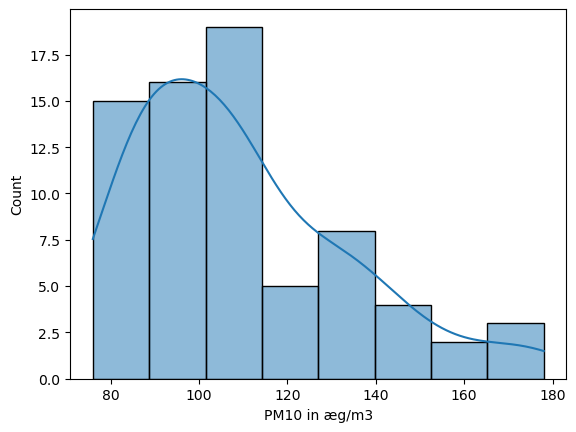

In [14]:
sns.histplot(df["PM10 in æg/m3"], kde = True)

<Axes: xlabel='SO2 in æg/m3', ylabel='Count'>

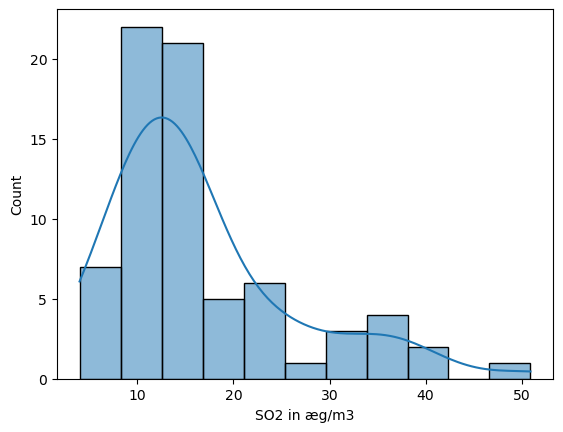

In [15]:
sns.histplot(df["SO2 in æg/m3"], kde = True)

<Axes: xlabel='NOx  in æg/m3', ylabel='Count'>

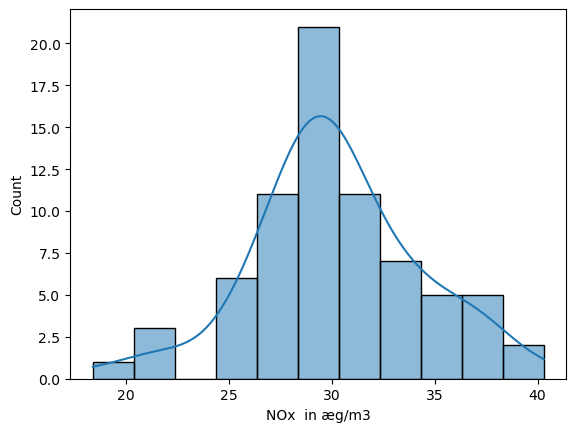

In [16]:
sns.histplot(df["NOx  in æg/m3"], kde = True)

<Axes: xlabel='AQI', ylabel='Count'>

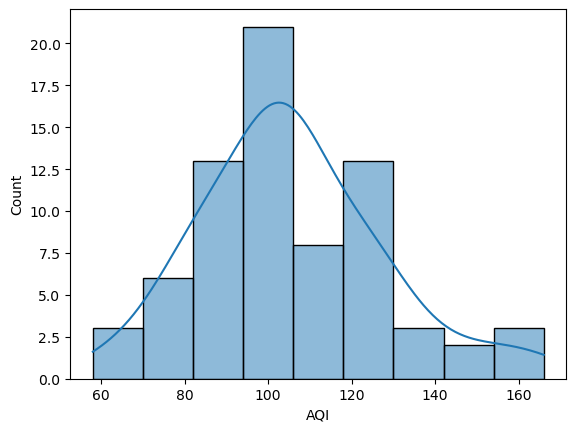

In [17]:
sns.histplot((df.AQI), kde = True)

The above graphs are Right skewed graph

#### Check Data Outlier

<Axes: >

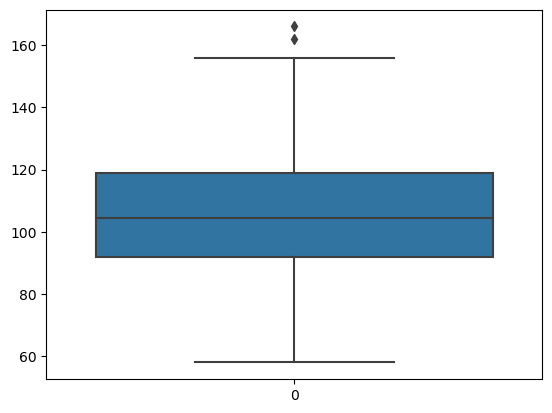

In [18]:
sns.boxplot(df.AQI)

In [48]:
q1=df.AQI.quantile(0.25)
q3=df.AQI.quantile(0.75)

In [49]:
IQR=q3-q1
IQR

26.0

In [21]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [50]:
upper_limit

159.5

In [22]:
df.median()

PM10 in æg/m3              105.50
SO2 in æg/m3                14.10
NOx  in æg/m3               29.75
 PM2.5  in æg/m3            47.00
Ammonia - NH3  in æg/m3     23.00
O3   in æg/m3               20.75
CO  in mg/m3                 0.50
 Benzene  in æg/m3           0.20
AQI                        104.50
dtype: float64

In [23]:
df['AQI'] = np.where(df['AQI']>upper_limit,104,df['AQI'])

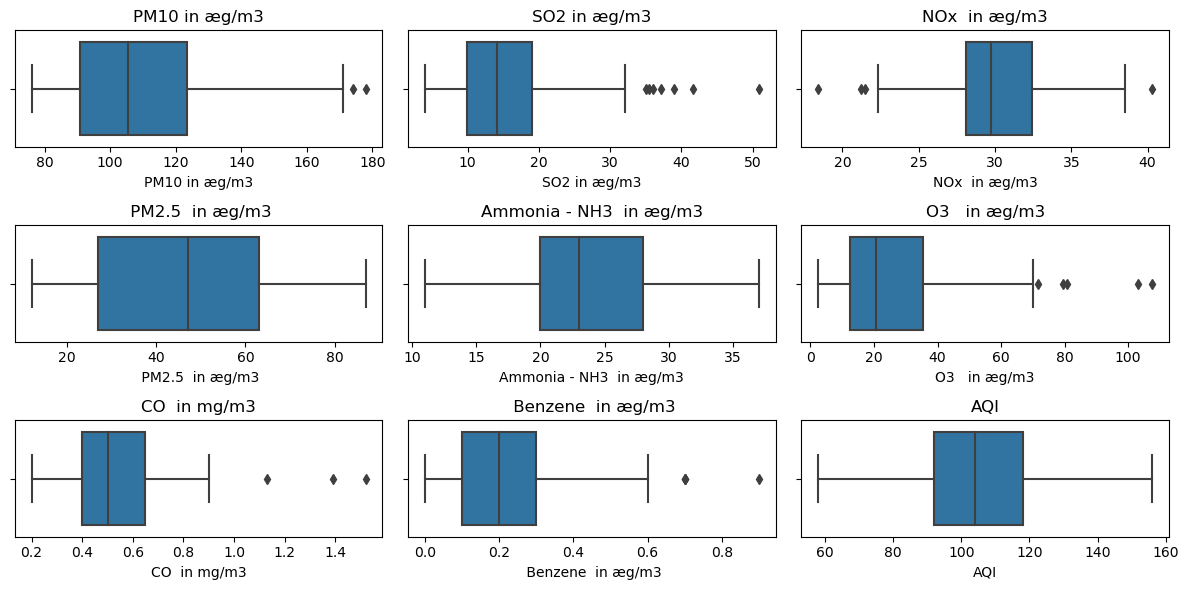

In [24]:
fig,ax = plt.subplots(ncols = 3, nrows = 3, figsize = (12,6))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(col)
    
plt.tight_layout()

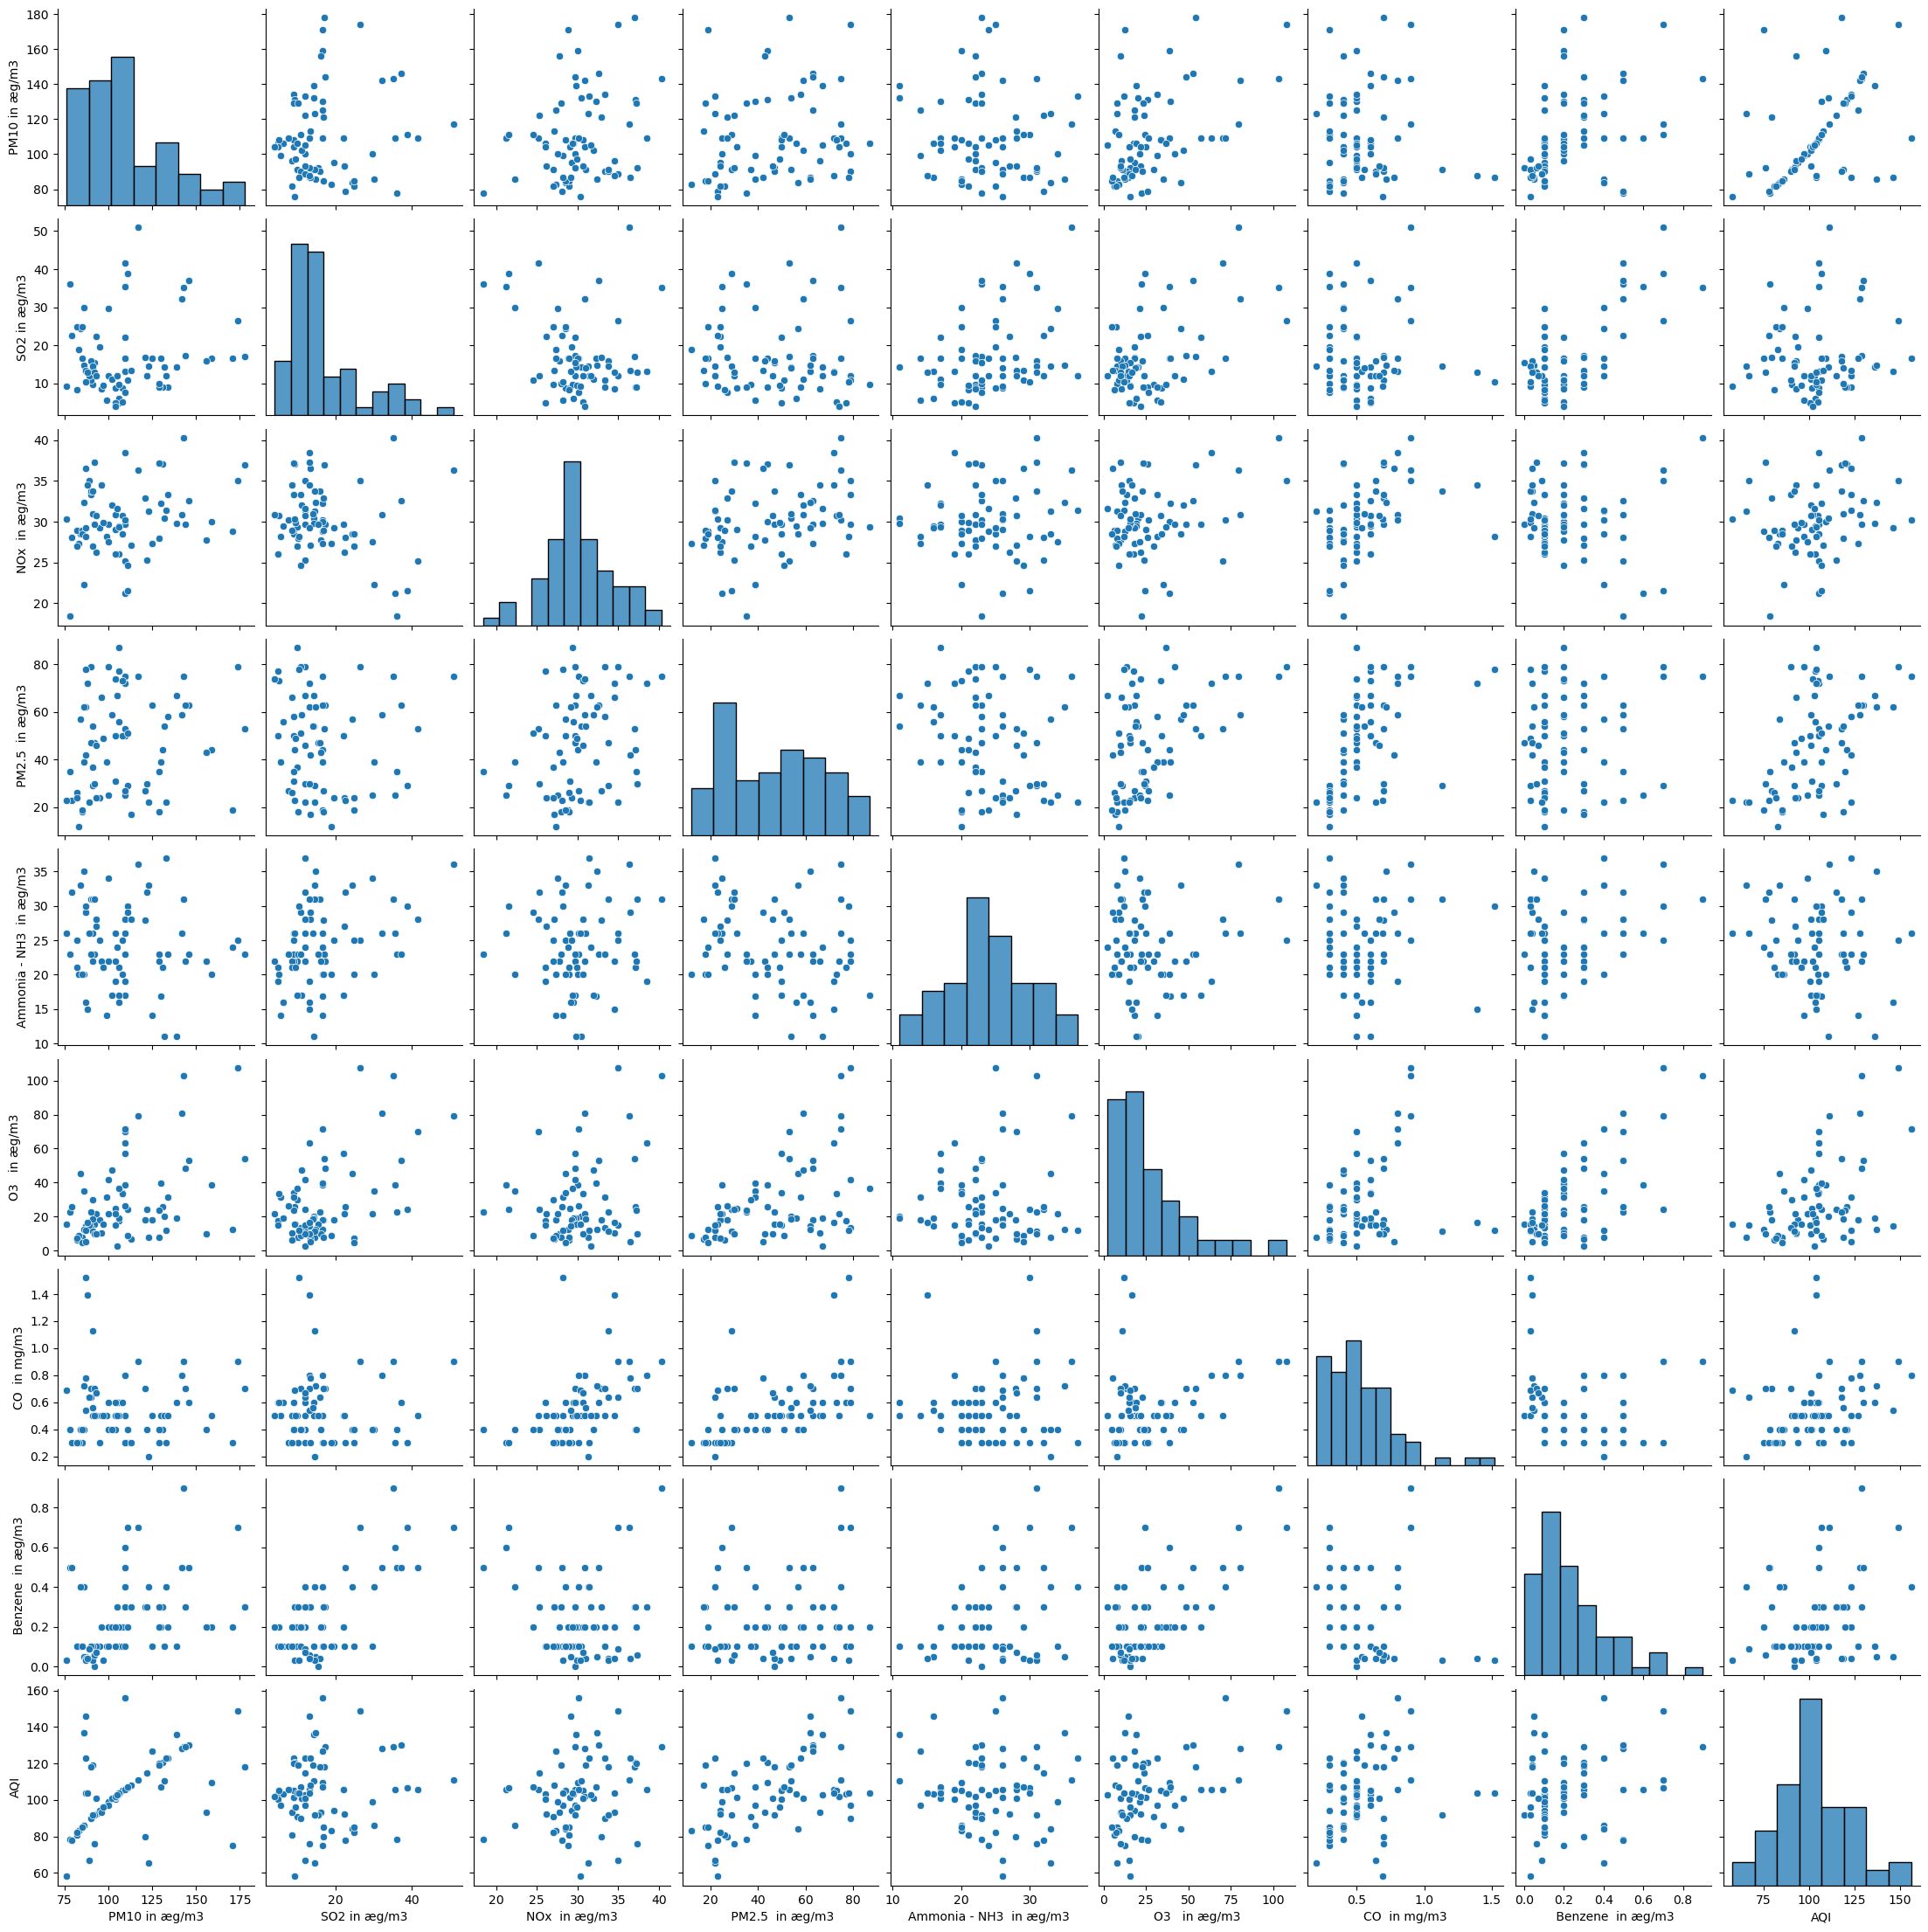

In [25]:
sns.pairplot(df)

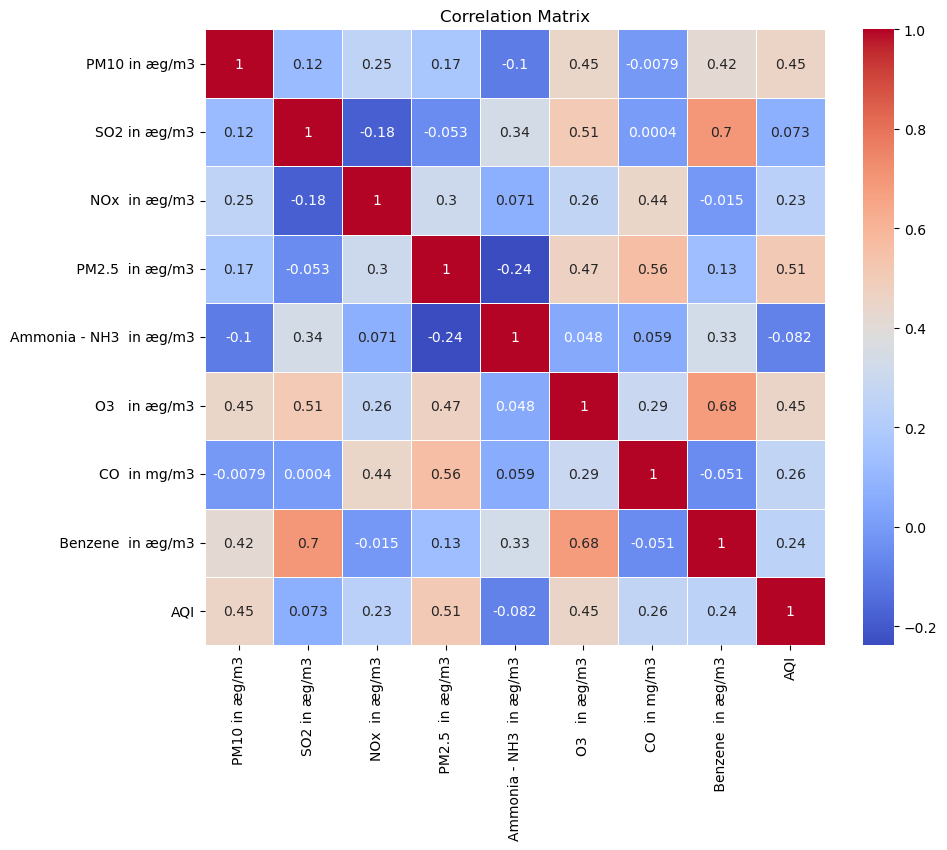

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

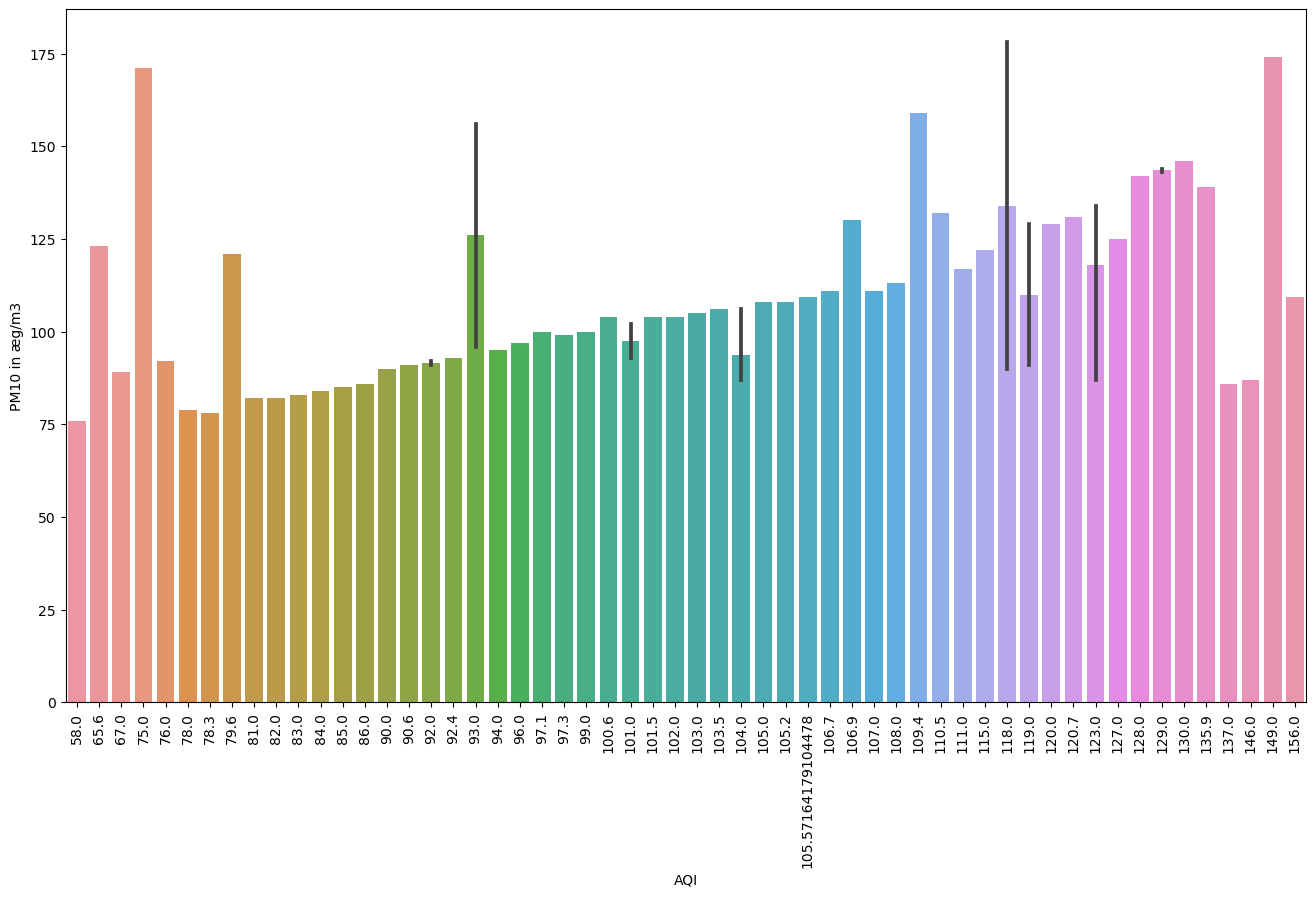

In [27]:
plt.figure(figsize = (16,9))
sns.barplot(data=df,x=df['AQI'],y=df['PM10 in æg/m3'])
plt.xticks(rotation = 90)
plt.show()

In [28]:
X = df.drop(columns=["AQI"],axis=1)
y = df.AQI

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((57, 8), (15, 8), (57,), (15,))

### Deep Learning

In [31]:
reg_model=Sequential()

#Adding the input layer
reg_model.add(Dense(7,activation="relu"))

#Adding four hidden layers
reg_model.add(Dense(128,activation="relu"))
reg_model.add(Dense(64,activation="relu"))
reg_model.add(Dense(32,activation="relu"))
reg_model.add(Dense(16,activation="relu"))

#Adding the output layer
reg_model.add(Dense(1,activation="linear"))

In [32]:
#compiling the model
reg_model.compile(optimizer="adam",loss="mse",metrics=['mse','mae'])

#fitting the ann regression model to the training data
reg_model.fit(X_train,y_train,epochs=10,batch_size=2,validation_data=(X_test,y_test))

Epoch 1/10
29/29 [==============================] - 1s 16ms/step - loss: 8958.4297 - mse: 8958.4297 - mae: 92.2233 - val_loss: 5769.1162 - val_mse: 5769.1162 - val_mae: 72.7494
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: 1211.4930 - mse: 1211.4930 - mae: 26.8755 - val_loss: 528.8065 - val_mse: 528.8065 - val_mae: 14.5194
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 376.8613 - mse: 376.8613 - mae: 13.0844 - val_loss: 600.0856 - val_mse: 600.0856 - val_mae: 18.3803
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 385.3677 - mse: 385.3677 - mae: 12.9061 - val_loss: 402.6575 - val_mse: 402.6575 - val_mae: 13.2066
Epoch 5/10
29/29 [==============================] - 0s 5ms/step - loss: 292.1651 - mse: 292.1651 - mae: 11.0541 - val_loss: 408.3034 - val_mse: 408.3034 - val_mae: 14.0584
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 277.0935 - mse: 277.0935 - mae: 11.8766 - val_loss: 414.7987 

#### Evaluation

In [33]:
reg_model.predict([[174.000000,26.4,35.0,79,25.0,107.6,0.9,0.7]])

1/1 [==============================] - 0s 135ms/step


array([[157.06165]], dtype=float32)

#### Testing

In [34]:
#evaluation
y_pred_1 = reg_model.predict(X_test)

1/1 [==============================] - 0s 132ms/step


In [35]:
MSE_1 = mean_squared_error(y_test, y_pred_1)
RMSE_1 = np.sqrt(MSE_1)
MAE_1 = mean_absolute_error(y_test, y_pred_1)
R2_Score_1 = r2_score(y_test, y_pred_1)

print(f'Mean Squared Error: {MSE_1} \n'
      f'Root Mean Squared Error: {RMSE_1} \n'
      f'Mean Absolute Error: {MAE_1} \n'
      f'R2-Score: {R2_Score_1}')

Mean Squared Error: 412.7506333305495 
Root Mean Squared Error: 20.31626524070183 
Mean Absolute Error: 15.867091081154289 
R2-Score: 0.2774764210223045


### Machine Learning

In [36]:
Lr =LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred_Lr = Lr.predict(X_test)

In [38]:
#evaluation metrics
MSE_Lr = mean_squared_error(y_test, y_pred_Lr)
RMSE_Lr = np.sqrt(MSE_Lr)
MAE_Lr = mean_absolute_error(y_test, y_pred_Lr)
R2_Score_Lr = r2_score(y_test, y_pred_Lr)

print(f'Mean Squared Error: {MSE_Lr} \n'
      f'Root Mean Squared Error: {RMSE_Lr} \n'
      f'Mean Absolute Error: {MAE_Lr} \n'
      f'R2-Score: {R2_Score_1}')

Mean Squared Error: 367.672903130404 
Root Mean Squared Error: 19.17479864641097 
Mean Absolute Error: 14.500213134878491 
R2-Score: 0.2774764210223045


In [39]:
#Random forest regressor
Rf = RandomForestRegressor()
Rf.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
y_pred_Rf = Rf.predict(X_test)


MSE_Rf = mean_squared_error(y_test, y_pred_Rf)
RMSE_Rf = np.sqrt(MSE_Rf)
MAE_Rf = mean_absolute_error(y_test, y_pred_Rf)
R2_Score_Rf = r2_score(y_test, y_pred_Rf)

print(f'Mean Squared Error: {MSE_Rf} \n'
      f'Root Mean Squared Error: {RMSE_Rf} \n'
      f'Mean Absolute Error: {MAE_Rf} \n'
      f'R2-Score: {R2_Score_Rf}')

Mean Squared Error: 377.61551416434276 
Root Mean Squared Error: 19.43233167080942 
Mean Absolute Error: 12.757677611940304 
R2-Score: 0.33898075317300846


In [41]:
#DECISION TREE REGRESSOR
Dt = DecisionTreeRegressor()
Dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
y_pred_Dt = Dt.predict(X_test)


MSE_Dt = mean_squared_error(y_test, y_pred_Dt)
RMSE_Dt = np.sqrt(MSE_Dt)
MAE_Dt = mean_absolute_error(y_test, y_pred_Dt)
R2_Score_Dt = r2_score(y_test, y_pred_Dt)

print(f'Mean Squared Error: {MSE_Dt} \n'
      f'Root Mean Squared Error: {RMSE_Dt} \n'
      f'Mean Absolute Error: {MAE_Dt} \n'
      f'R2-Score: {R2_Score_Dt}')

Mean Squared Error: 845.3587539912379 
Root Mean Squared Error: 29.075053808913886 
Mean Absolute Error: 16.373333333333335 
R2-Score: -0.4798078624987223


In [43]:
#xg boost regressor
Xgbr = xgb.XGBRegressor()
Xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
y_pred_Xgbr = Xgbr.predict(X_test)


MSE_Xgbr = mean_squared_error(y_test, y_pred_Xgbr)
RMSE_Xgbr = np.sqrt(MSE_Xgbr)
MAE_Xgbr = mean_absolute_error(y_test, y_pred_Xgbr)
R2_Score = r2_score(y_test, y_pred_Xgbr)

print(f'Mean Squared Error: {MSE_Dt} \n'
      f'Root Mean Squared Error: {RMSE_Dt} \n'
      f'Mean Absolute Error: {MAE_Dt} \n'
      f'R2-Score: {R2_Score}')

Mean Squared Error: 845.3587539912379 
Root Mean Squared Error: 29.075053808913886 
Mean Absolute Error: 16.373333333333335 
R2-Score: 0.39195726500479355


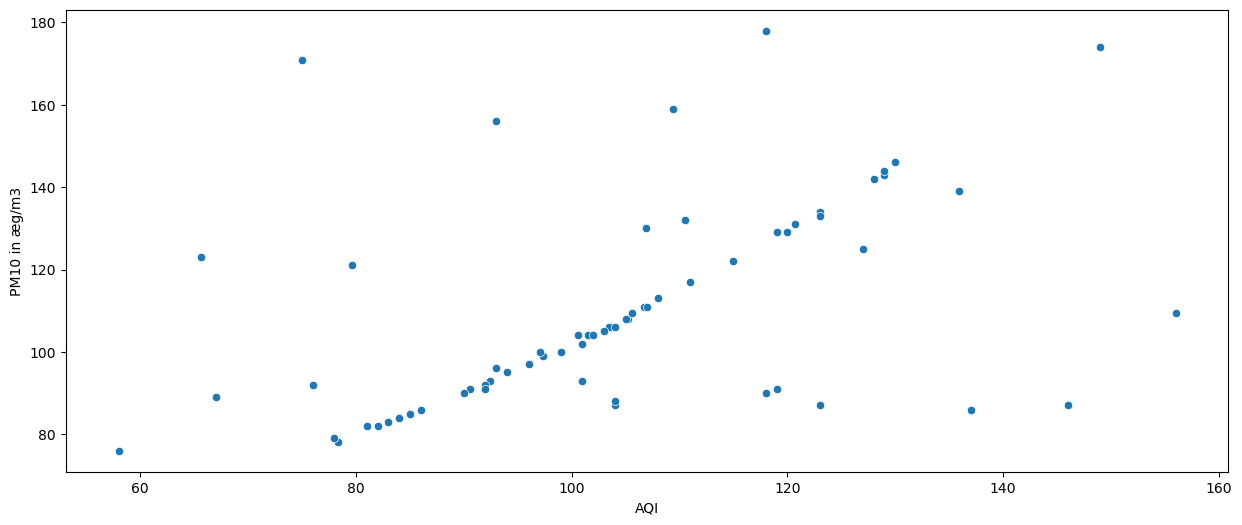

In [45]:
#Some Basic Visualizations on Real World or Augmented Data
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['AQI'],y=df['PM10 in æg/m3'])
plt.show()